In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "3" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-05-25 12:47:02.106528: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-25 12:47:02.126822: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A40 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 84 deviceMemorySize: 44.56GiB deviceMemoryBandwidth: 648.29GiB/s
2022-05-25 12:47:02.127221: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-25 12:47:02.128939: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-25 12:47:02.130607: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-05-25 12:47:02.130946: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-0

In [10]:
stream = "gd1"

In [11]:
df, file = load_file(stream = stream, percent_bkg = 100)

### Prepare datasets for training

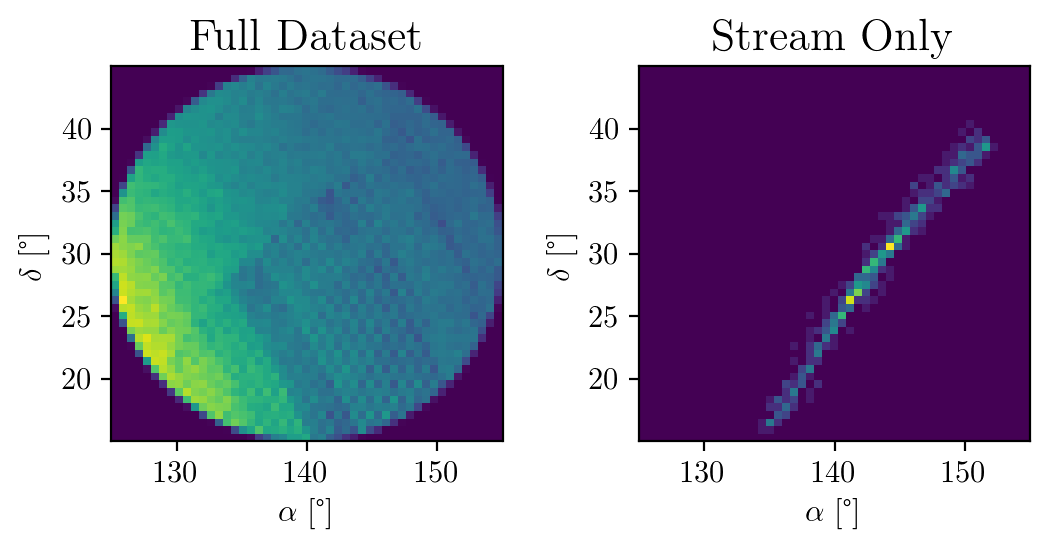

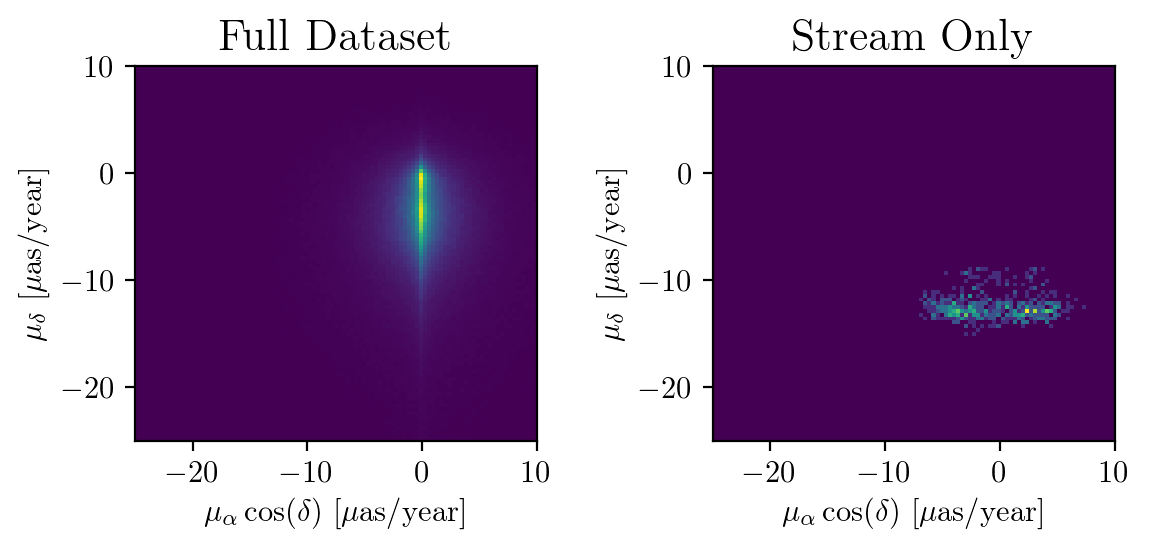

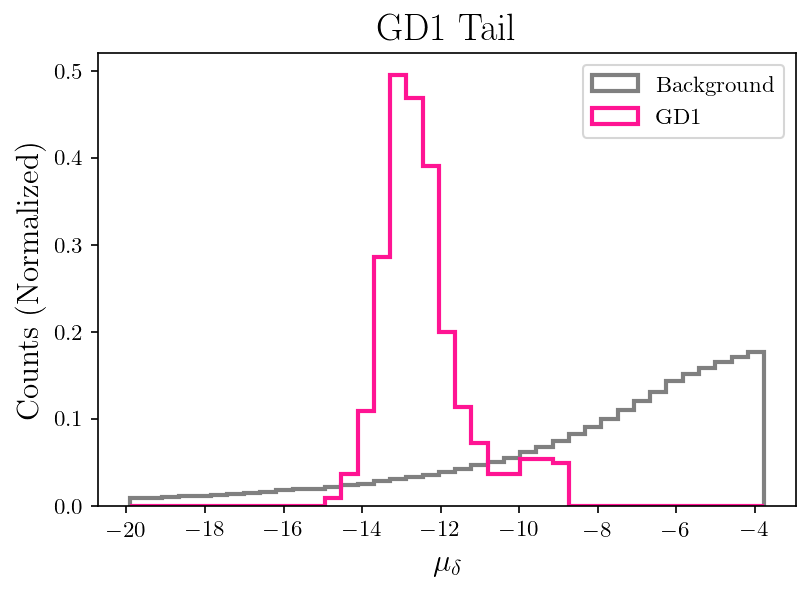

In [12]:
visualize_stream(df)

Sideband region: [-18.0,-9.5]
Signal region: [-15.0,-11.0]
Total counts: SR = 70,835, SB = 71,692


/clusterfs/ml4hep/mpettee/GaiaCWoLa/notebooks/../python/functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Signal region has 470 stream and 70,365 bkg events (0.67%).
Sideband region has 40 stream and 71,652 bkg events (0.06%).
f_sig = 12.0X f_sideband.


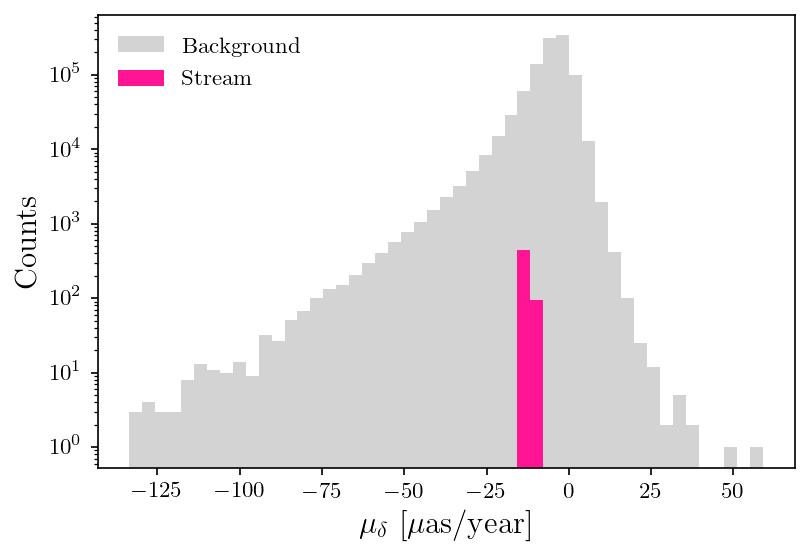

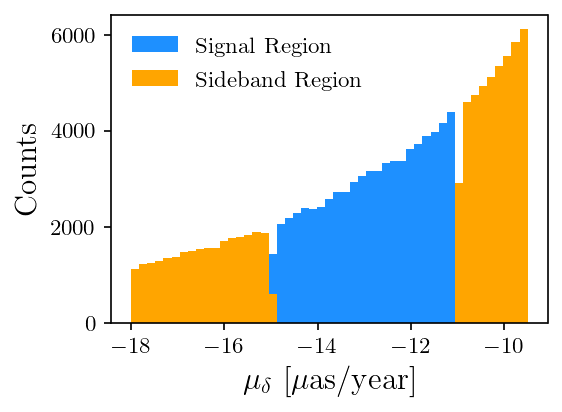

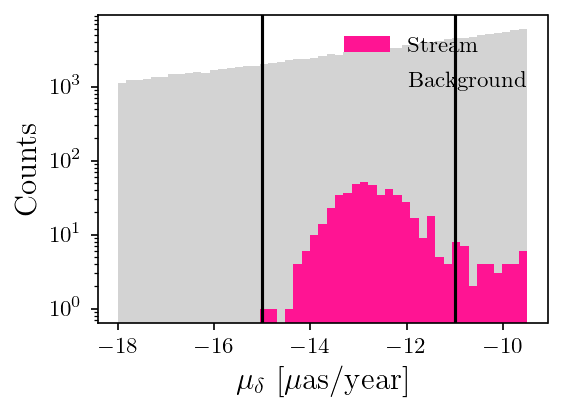

In [13]:
df = signal_sideband(df, stream = stream)

# Train

In [14]:
tf.keras.backend.clear_session()

Not using sample weights
Training on 99,768 events.


2022-05-25 12:55:45.371700: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-05-25 12:55:45.380604: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2994330000 Hz
2022-05-25 12:55:45.382161: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x558cf1eb68c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-25 12:55:45.382215: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-05-25 12:55:45.477218: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x558cf1eb8f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-05-25 12:55:45.477275: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2022-05-25 12:55:45.478161: I tenso

Epoch 1/2000


2022-05-25 12:59:07.906766: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


7/7 [==============================] - 0s 29ms/step - loss: 0.6952 - accuracy: 0.4993 - val_loss: 0.6933 - val_accuracy: 0.5027
Epoch 2/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.6936 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.5027
Epoch 3/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.6933 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.5071
Epoch 4/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5064 - val_loss: 0.6933 - val_accuracy: 0.5015
Epoch 5/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.6930 - accuracy: 0.5080 - val_loss: 0.6930 - val_accuracy: 0.5059
Epoch 6/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.6928 - accuracy: 0.5111 - val_loss: 0.6930 - val_accuracy: 0.5039
Epoch 7/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.6928 - accuracy: 0.5093 - val_loss: 0.6931 - val_accuracy: 0.5053
Epoch 8/2000
7/7 [==========

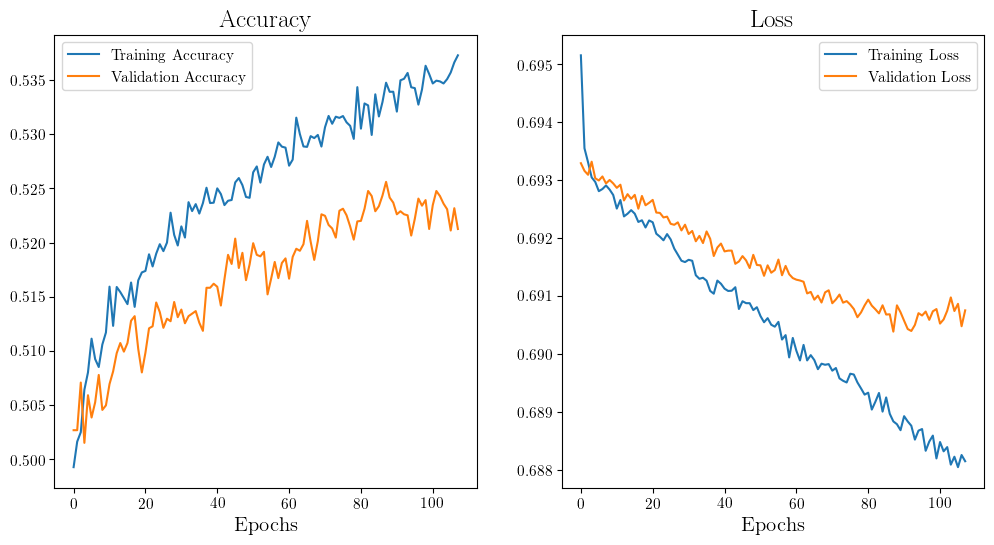

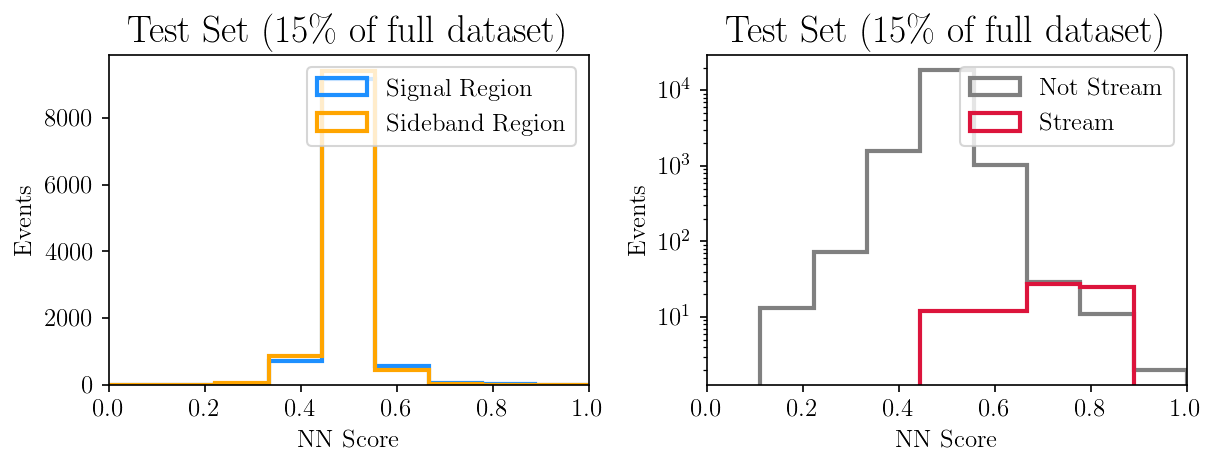

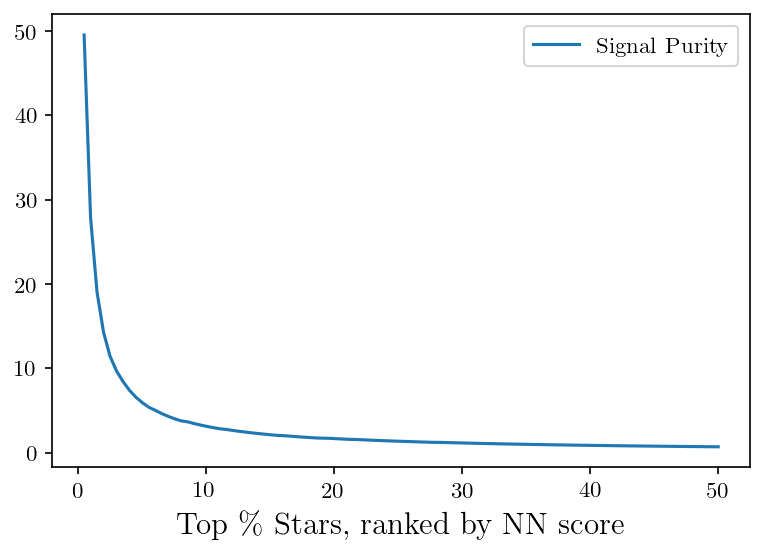

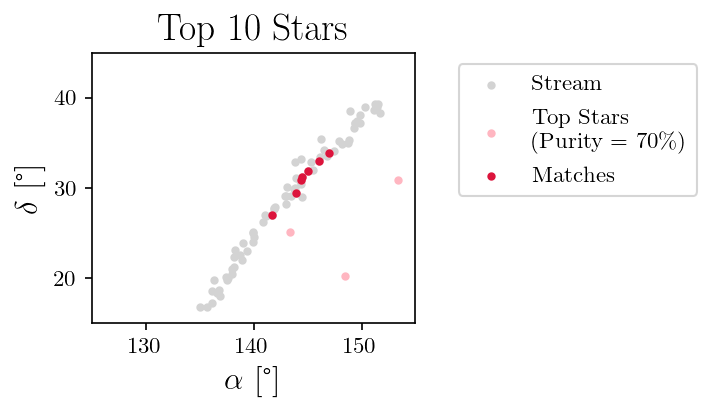

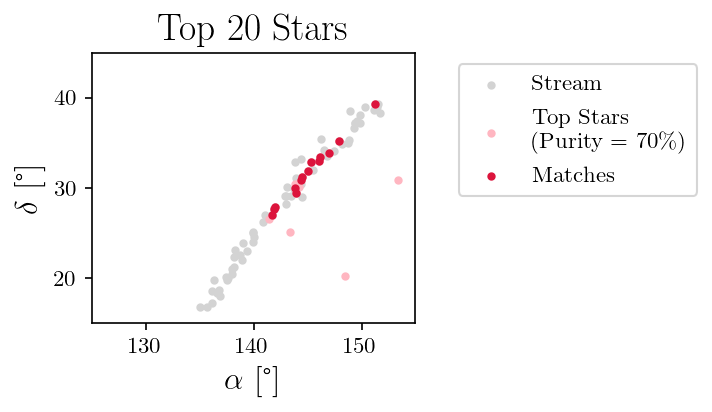

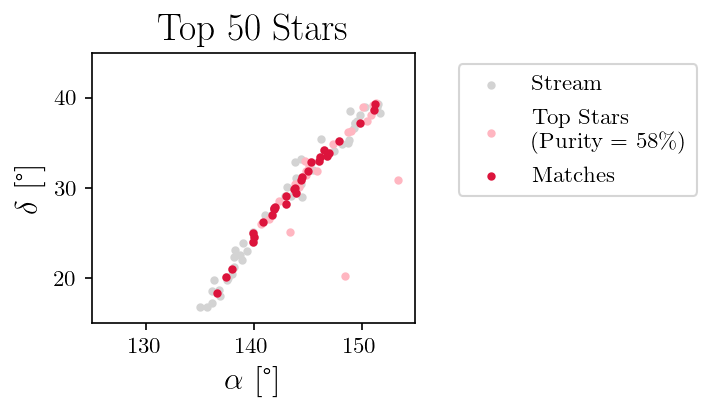

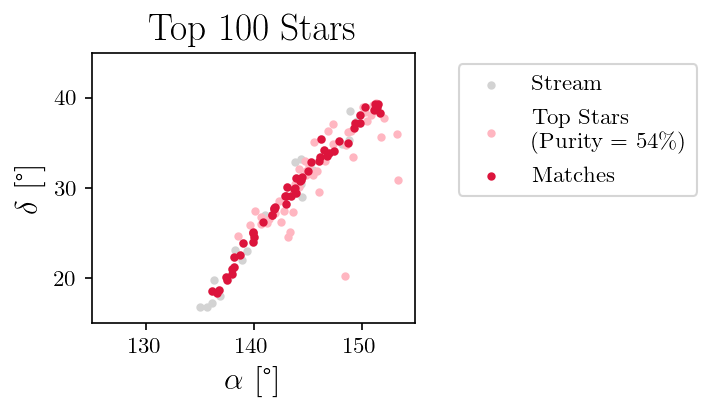

In [17]:
test = train(df, 
      n_folds = 1, 
      best_of_n_loops = 1,
      layer_size = 256, 
      batch_size = 15000, 
      dropout = 0.2, 
      epochs = 2000, 
      patience = 20, 
      l2_reg = 0,
      save_folder = "gd1_bulk_patch",
            )